# IMPORT PACKAGES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

# LOAD THE DATASET

In [4]:
iris = pd.read_excel('iris.xls')
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# DATA PREPROCESSING

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Finding the value count of 'Classification' column
iris['Classification'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [12]:
#Finding the unique values of 'Classification' column
iris['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
iris['Classification'].nunique()

3

# VIZUALIZING DATA


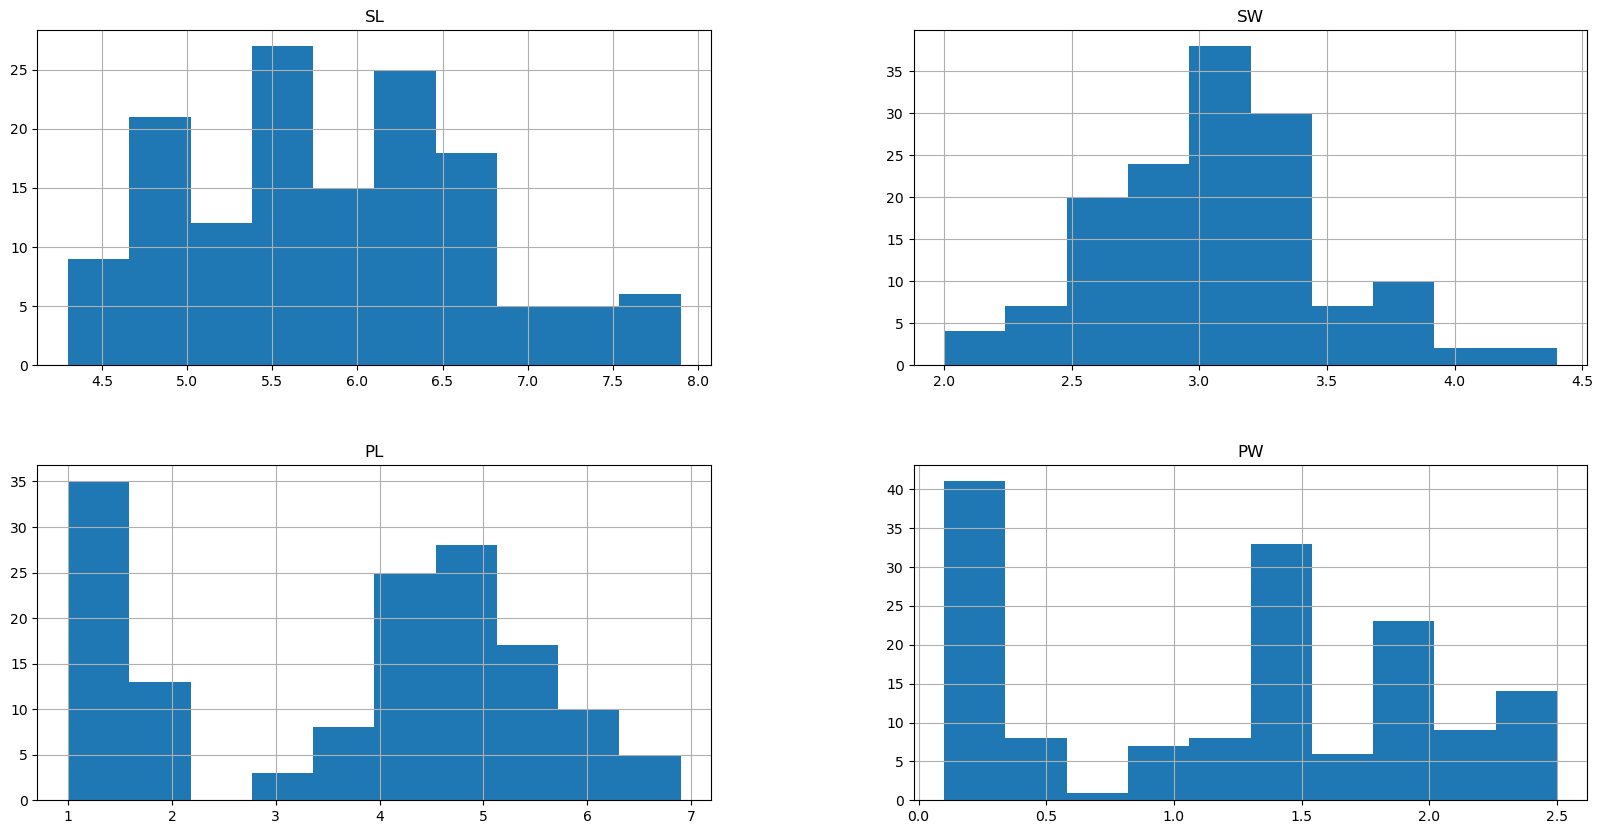

In [19]:
freqgraph= iris.select_dtypes(include ='float')
freqgraph.hist(figsize=(20,10))
plt.show()

# Scatter Plot

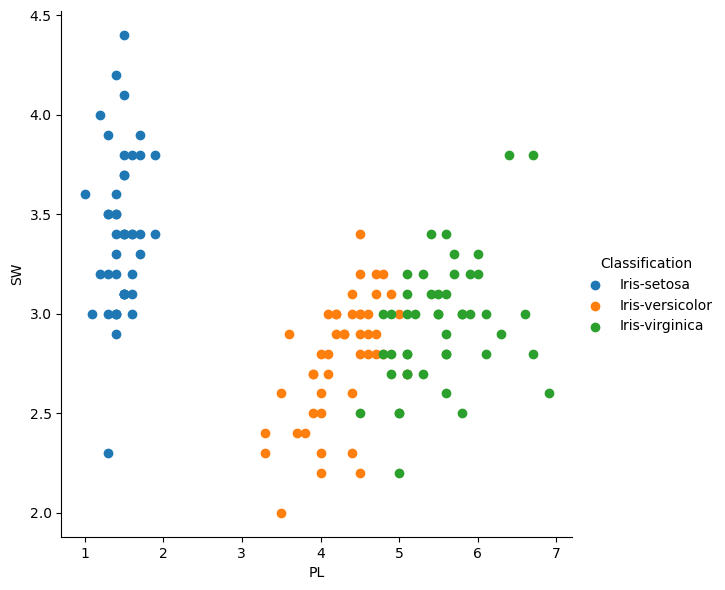

In [20]:
sns.FacetGrid(iris,hue='Classification',height=6).map(plt.scatter,'PL','SW').add_legend()

# a)Missing Values

In [14]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [18]:
#We can see that there are null values in three columns 'SL' 'SW' 'PL'
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [21]:
num_cols = iris[['SL', 'SW', 'PL']]

In [22]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

In [23]:
#Replacing null values with median
iris['SL']=iris['SL'].fillna(iris['SL'].median())
iris['SW']=iris['SW'].fillna(iris['SW'].median())
iris['PL']=iris['PL'].fillna(iris['PL'].median())

In [24]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# b)Outlier detection

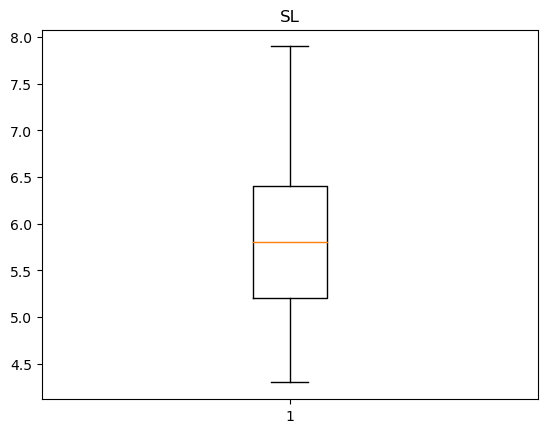

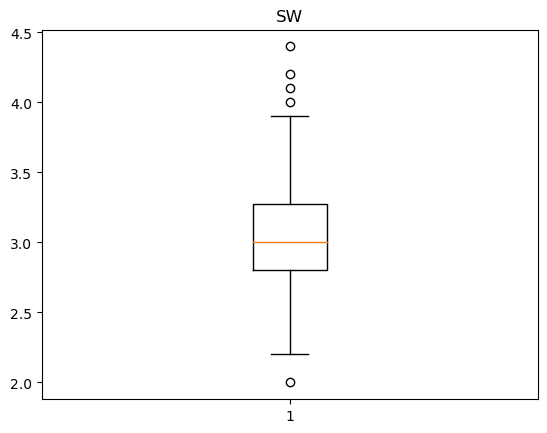

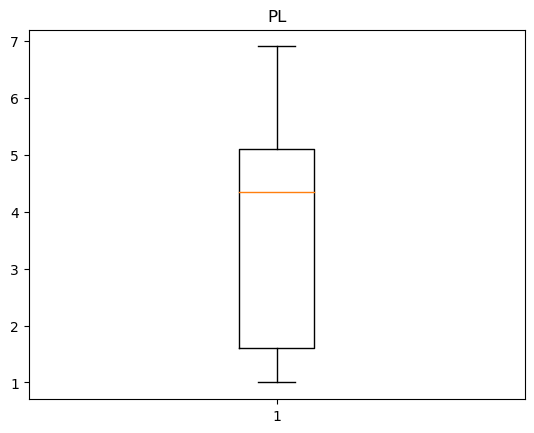

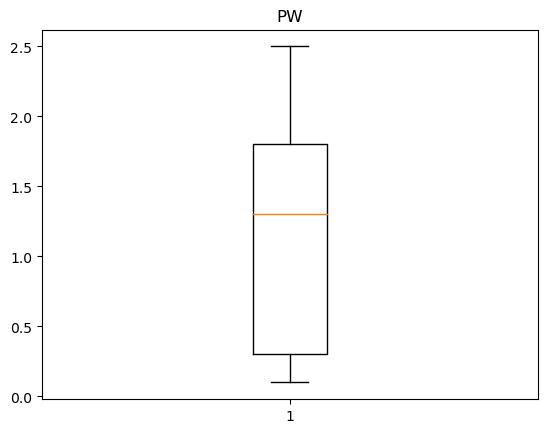

In [25]:
for i in ['SL','SW','PL','PW']:
    plt.figure()
    plt.boxplot(iris[i])
    plt.title(i)
    plt.show()

Outlier is in the column 'SW' 

In [28]:
#Removing the outlier from 'SW'.
#FInding Q1,Q2 & Q3
Q1=np.percentile(iris['SW'],25,interpolation='midpoint')
Q2=np.percentile(iris['SW'],50,interpolation='midpoint')
Q3=np.percentile(iris['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [29]:
#Finding the median
iris['SW'].median()

3.0

In [30]:
#Finding IQR
IQR=Q3-Q1
IQR

0.4500000000000002

In [31]:
low_lim=Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [32]:
outlier =[]
for x in iris['SW']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)

In [33]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [37]:
#Finding the index of the outlier less than lower limit

ind1=iris['SW']<low_lim
iris.loc[ind1].index

Int64Index([60], dtype='int64')

In [38]:
#Dropping the index value of low_lim
iris.drop([60],inplace=True)

In [41]:
#Finding the index of the outlier greater than upper limit

ind1=iris['SW']>up_lim
iris.loc[ind1].index
iris=iris.drop([14, 15, 32, 33])

In [43]:
#Rechecking whether there is any outlier present in 'SW' column

ind1=iris['SW']>up_lim
ind2=iris['SW']<low_lim
print(iris.loc[ind1].index)
print(iris.loc[ind2].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [44]:
## Using Label encoder to convert categorical column to numerical column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
iris['Classification']= le.fit_transform(iris['Classification'])
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
y = iris['Classification']
X=iris.drop(['Classification'],axis=1)
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int64

In [49]:
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [50]:
# split the data for training and testing


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# c)Model Training
# 1.Logostic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
warnings.simplefilter("ignore")
clf = LogisticRegression()
model = clf.fit(X_train,y_train)

In [65]:
y_pred = model.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average ='macro'))
print('Recall = ',recall_score(y_test,y_pred,average ='macro'))
print('f1 score = ',f1_score(y_test,y_pred,average ='macro'))

Accuracy =  0.8918918918918919
Precision =  0.8834498834498835
Recall =  0.8915343915343915
f1 score =  0.8839506172839506


In [67]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

# 2.KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
#warnings.simplefilter("ignore")
metric_k=[]
neighbors =np.arange(3,15)

#Here we are finding the set of accuracy values, and storing it to a list metric_k, for values of k ranging from 3 to 15

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)
    
metric_k

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

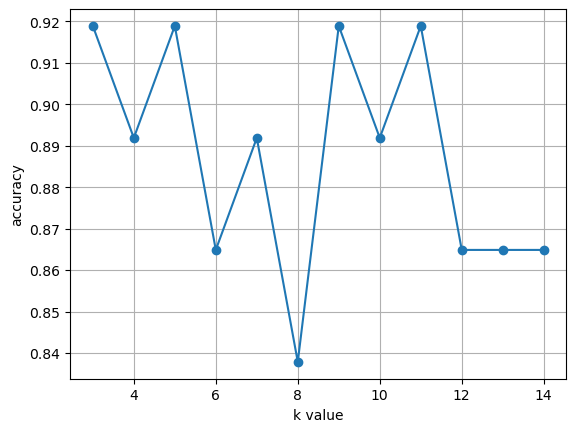

In [97]:
#Plotting the metric_k values to get the value of k having the maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [99]:
warnings.simplefilter("ignore")
#Here we are using the n_neighbors as 4 as this value of k have maximum accuracy
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model=classifier.fit(X_train,y_train)
y_pred_k=model.predict(X_test)
acc=accuracy_score(y_test,y_pred_k)

In [100]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average ='macro'))
print('Recall = ',recall_score(y_test,y_pred,average ='macro'))
print('f1 score = ',f1_score(y_test,y_pred,average ='macro'))

Accuracy =  0.8648648648648649
Precision =  0.861111111111111
Recall =  0.8677248677248678
f1 score =  0.8570071903405238


In [80]:
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2], dtype=int64)

In [81]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

# 3.SVM

In [83]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [84]:
y_pred_svm=svmclf.predict(X_test)

#Evaluating the SVM-linear model
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('f1 score=',f1_score(y_test,y_pred_svm,average='macro'))
print(confusion_matrix(y_test,y_pred_svm))

Accuracy= 0.918918918918919
f1 score= 0.9103313840155945
[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


In [85]:
svmclf=SVC(kernel='rbf')
svmclf.fit(X_train,y_train)
y_pred_svm=svmclf.predict(X_test)

#Evaluating the SVM-rbf model
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('f1 score=',f1_score(y_test,y_pred_svm,average='macro'))
print(confusion_matrix(y_test,y_pred_svm))

Accuracy= 0.8648648648648649
f1 score= 0.8570071903405238
[[13  1  0]
 [ 0  8  1]
 [ 0  3 11]]


In [86]:
svmclf=SVC(kernel='poly')
svmclf.fit(X_train,y_train)
y_pred_svm=svmclf.predict(X_test)

#Evaluating the SVM-polynomial model
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('f1 score=',f1_score(y_test,y_pred_svm,average='macro'))
print(confusion_matrix(y_test,y_pred_svm))

Accuracy= 0.9459459459459459
f1 score= 0.9391230310770541
[[13  1  0]
 [ 0  8  1]
 [ 0  0 14]]


# 4) Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred_dt=dt_clf.predict(X_test)


print('Accuracy=',accuracy_score(y_test,y_pred_dt))
print('f1 score=',f1_score(y_test,y_pred_dt,average='macro'))
print(confusion_matrix(y_test,y_pred_dt))

Accuracy= 0.918918918918919
f1 score= 0.9103313840155945
[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


# 5.Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [95]:
y_pred_rf=rf_clf.predict(X_test)


print('Accuracy=',accuracy_score(y_test,y_pred_rf))
print('f1 score=',f1_score(y_test,y_pred_rf,average='macro'))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy= 0.918918918918919
f1 score= 0.9103313840155945
[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


In [101]:
#Considering the Accuracy,Logistic 89% , kNN have 86%,SVM(linear-91%,rbf=86%,poly=94%),Decision Tree and Random Forest has 91%.

#Considering the f1 score,Logistic 88% and kNN have 85%,SVM(linear-91%,rbf=85%,poly=94%),Decision Tree has 91%,Random Forest has 91%.

#Hence,SVM-polynomial model is the best model.